In [24]:
import sqlite3    #importing sqlite package & libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression    #importing sklearn packages
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from math import sqrt #importing sqrt package
import matplotlib.pyplot as plt   #importing matplotlib package
import seaborn as sns   #importing seaborn package
%matplotlib inline

In [4]:
cnx = sqlite3.connect('database.sqlite')    #Creating connection.
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)    #selecting all data of 'Player_Attribute' table
df.head()     #displaying top 5 results

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
#droping features that are not required for rating prediction
df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1,inplace=True)

In [9]:
df.head()     #displaying top 5 results

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


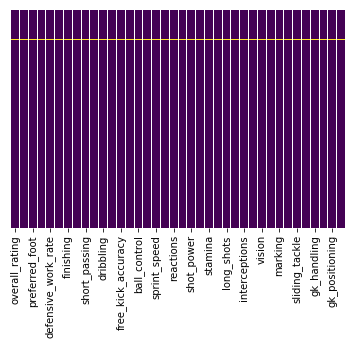

In [11]:
#visualizing null values from dataframe
sns.heatmap(df.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')

C:\Users\Zubair\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


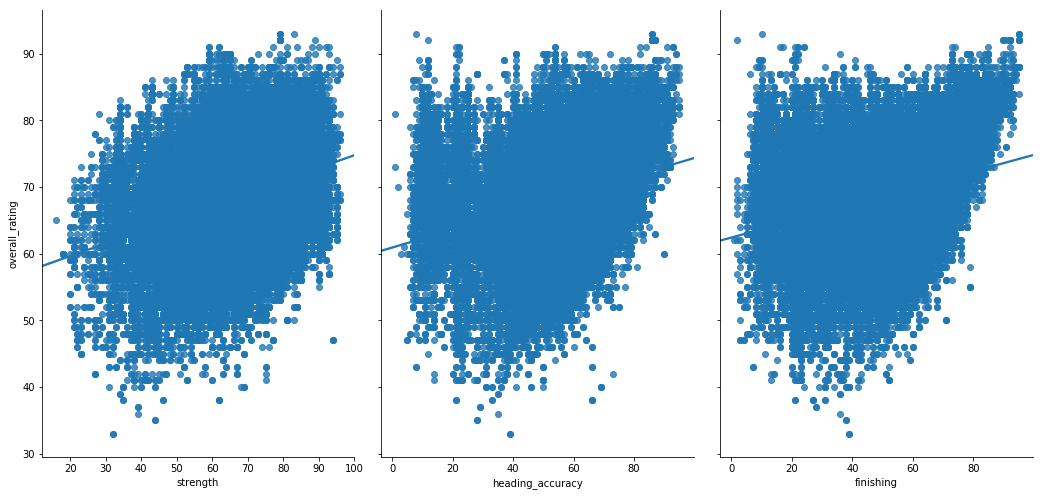

In [12]:
#drawing pairplot of dependent feature
sns.pairplot(df.head(100000), x_vars=['strength','heading_accuracy','finishing'], y_vars='overall_rating', height=7, aspect=0.7, kind='reg')

In [13]:
df.columns   #displaying all columns of dataframe

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [14]:
#labeling different label's of 'attacking_work_rate' column in 3 labels
df['attacking_work_rate']=df.attacking_work_rate.map({
    'low':'low','medium':'medium','high':'high',None:None,'norm':None,'stoc':None, 'None':None,'le':None,'y':None
})
pd.Categorical(df['attacking_work_rate']).describe()  #describing 'attacking_work_rate' column

,counts,freqs
categories,,
high,42823,0.232762
low,8569,0.046576
medium,125070,0.679810
NaN,7516,0.040853


In [15]:
#labeling different label's of 'defensive_work_rate' column in 3 labels
df['defensive_work_rate']=df.defensive_work_rate.map({
    '6':None, '9':None, 'high':'high', '_0':None, 'tocky':None, '8':None, 'o':None, None:None, 'ormal':None, 'medium':'medium','4':None, '3':None, '2':None, 'es':None, '0':None, '7':None, '1':None, 'low':'low', 'ean':None, '5':None
})
pd.Categorical(df['defensive_work_rate']).describe()  #describing the 'defensive_work_rate' column

,counts,freqs
categories,,
high,27041,0.146980
low,18432,0.100186
medium,130846,0.711205
NaN,7659,0.041630


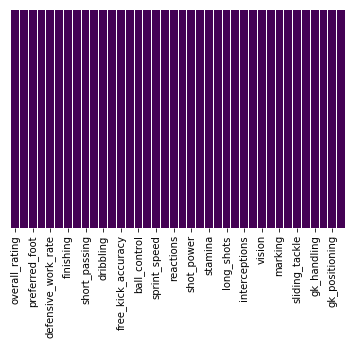

In [16]:
df.dropna(inplace=True)    #droping records with nan values
sns.heatmap(df.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')   #visualizing

In [17]:
df.isnull().sum()     #checking if there are any null values

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [19]:
preferred_foot_df=pd.get_dummies(df.preferred_foot,prefix='pre_ft')  #performing label-encoding on columns
attacking_work_rate = pd.get_dummies(df.attacking_work_rate,prefix='attack_wr')
defensive_work_rate = pd.get_dummies(df.defensive_work_rate,prefix='defense_wr')
df.shape     #knowing df shape

(176161, 38)

In [20]:
df.head()     #displaying top 5 results

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
#concatinating all labeled dataframes with actual dataframe
df = pd.concat([df,preferred_foot_df,attacking_work_rate,defensive_work_rate],axis=1)
#droping columns on whom label encoding has been performed
df.drop(['preferred_foot','defensive_work_rate','attacking_work_rate'],inplace=True,axis=1)
df.head()     #displaying top 5 results

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,pre_ft_left,pre_ft_right,attack_wr_high,attack_wr_low,attack_wr_medium,defense_wr_high,defense_wr_low,defense_wr_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1


In [22]:
#selecting features for model training
x_features =['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'pre_ft_left', 'defense_wr_high', 'defense_wr_low',
       'attack_wr_high', 'attack_wr_low']
y_features=['overall_rating']
X=df.loc[:,x_features]    # dividing data into independent & dependent features x and y
y=df.loc[:,y_features]
X.head()     #displaying top 5 independent features

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,pre_ft_left,defense_wr_high,defense_wr_low,attack_wr_high,attack_wr_low
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,6.0,11.0,10.0,8.0,8.0,0,0,0,0,0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,6.0,11.0,10.0,8.0,8.0,0,0,0,0,0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,6.0,11.0,10.0,8.0,8.0,0,0,0,0,0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,5.0,10.0,9.0,7.0,7.0,0,0,0,0,0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,5.0,10.0,9.0,7.0,7.0,0,0,0,0,0


In [27]:
#getting training & test set data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
regressor = LinearRegression()   #initializing model instance for fitting data into model
regressor.fit(X_train, y_train)    #fitting data into linear regression model
y_pred = regressor.predict(X_test)    # Predicting results
print('mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred)) #mean absolute error
print('mean squared error: ',metrics.mean_squared_error(y_test,y_pred)) #mean squared error
score=r2_score(y_test,y_pred)      #computing accuracy of model using r2_score 
print(score*100,'%')  #printing accuracy

mean absolute error:  2.1212086026454005
mean squared error:  7.72954501630158
84.43756028967708 %


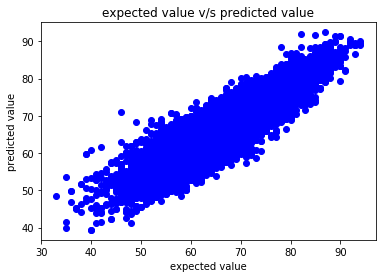

In [29]:
plt.scatter(y_test,y_pred,color='blue')    #plotting expected v/s predicted value
plt.title('expected value v/s predicted value')   #setting title
plt.xlabel('expected value')    #labeling x-axis
plt.ylabel('predicted value')   #labeling y-axis
plt.show()   #displaying plot